# R로 만들 수 있는 그래프

- 2차원 그래프, 3차원 그래프

- 지도 그래프

- 네트워크 그래프

- 모션 차트
    - 시간에 따른 데이터의 움직임을 보여주는 차트
    
- 인터랙티브 그래프
    - 마우스 조작에 반응하는 차트

## 산점도 만들기

- 산점도(Scatter Plot) : 데이터를 x축과 y축에 점으로 표현한 그래프
- 나이와 소득처럼, 연속 값으로 된 두 변수의 관계를 표현할 때 사용

In [1]:
library(ggplot2)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


- ggplot2문법의 구조

1. 배경 설정
2. 그래프 추가
3. 설정 추가(축 범위, 색, 표식)

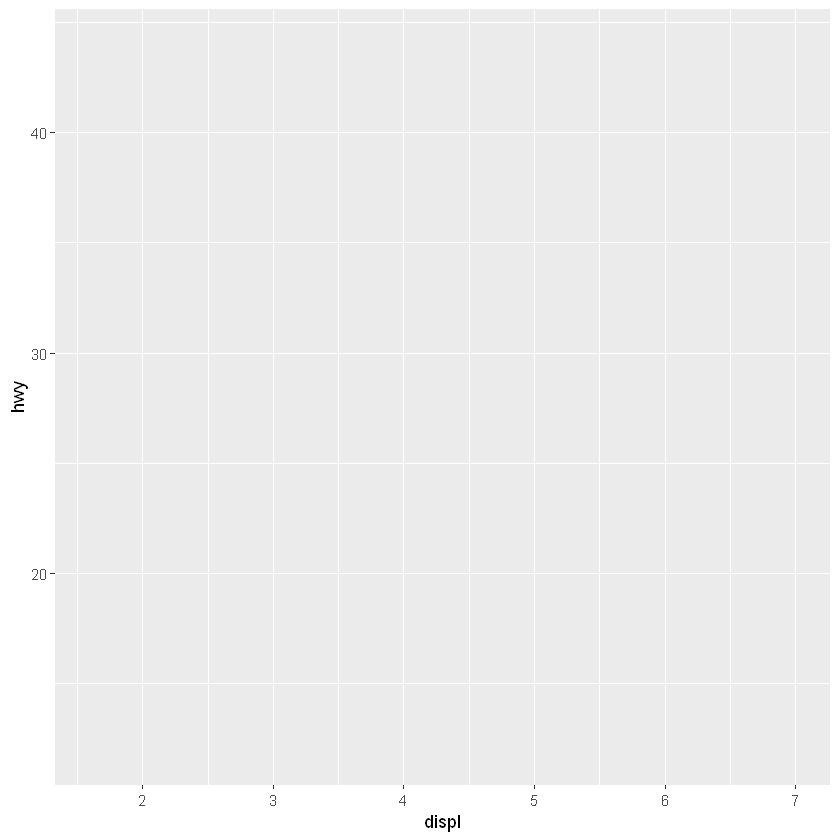

In [2]:
# x축은 displ, y축은 hwy로 지정해 배경 생성
ggplot(data = mpg, aes(x = displ, y = hwy))

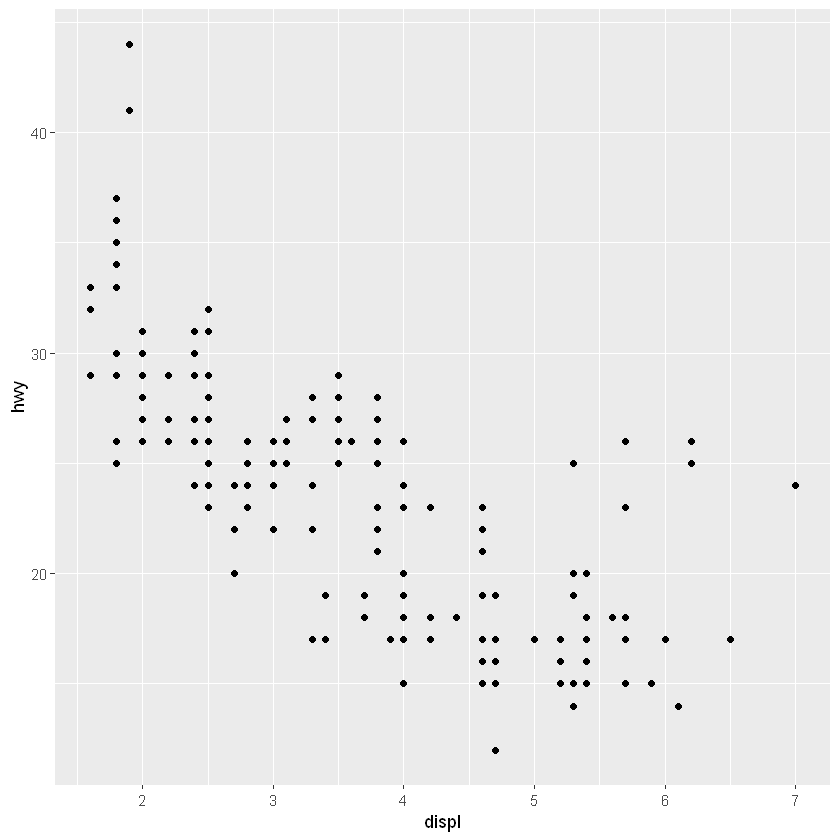

In [3]:
# 배경에 산점도 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) +
    geom_point()

- ggplot2에서는 + 기호로 연결

Warning message:
"Removed 105 rows containing missing values (geom_point)."

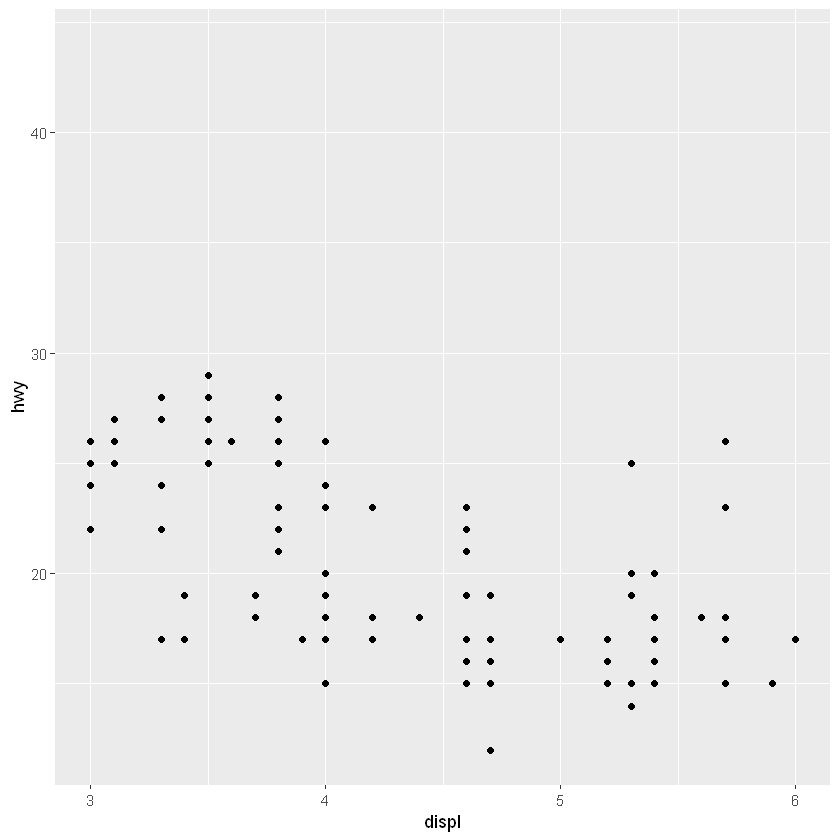

In [4]:
# x축의 범위 3 ~ 6으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    xlim(3, 6)

Warning message:
"Removed 105 rows containing missing values (geom_point)."

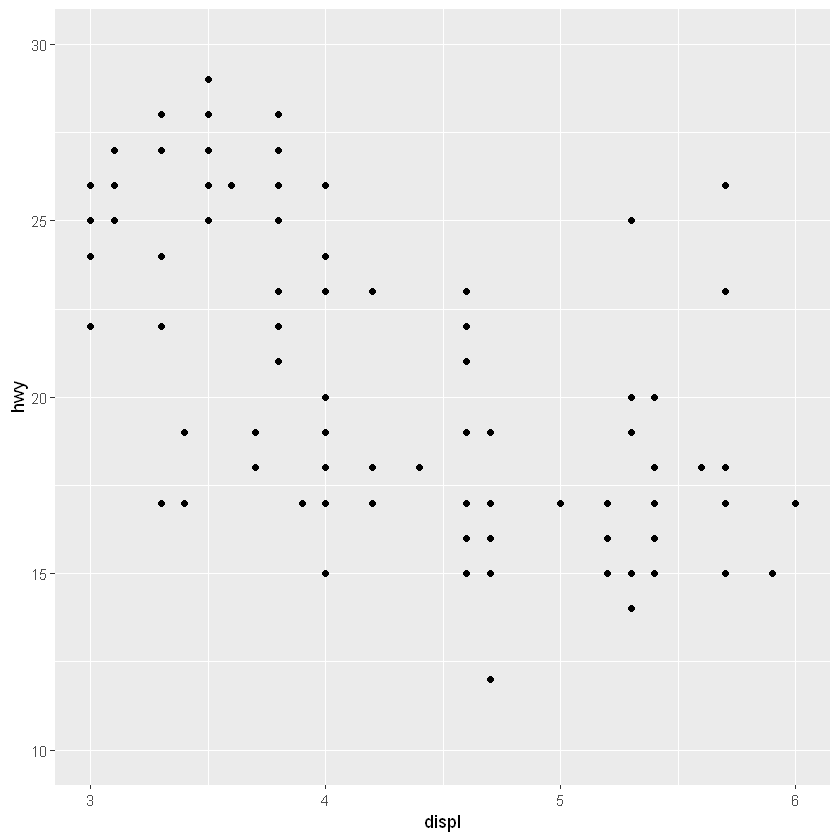

In [5]:
# x축 범위 3 ~ 6, y축 범위 10 ~ 30으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    xlim(3, 6) +
    ylim(10, 30)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


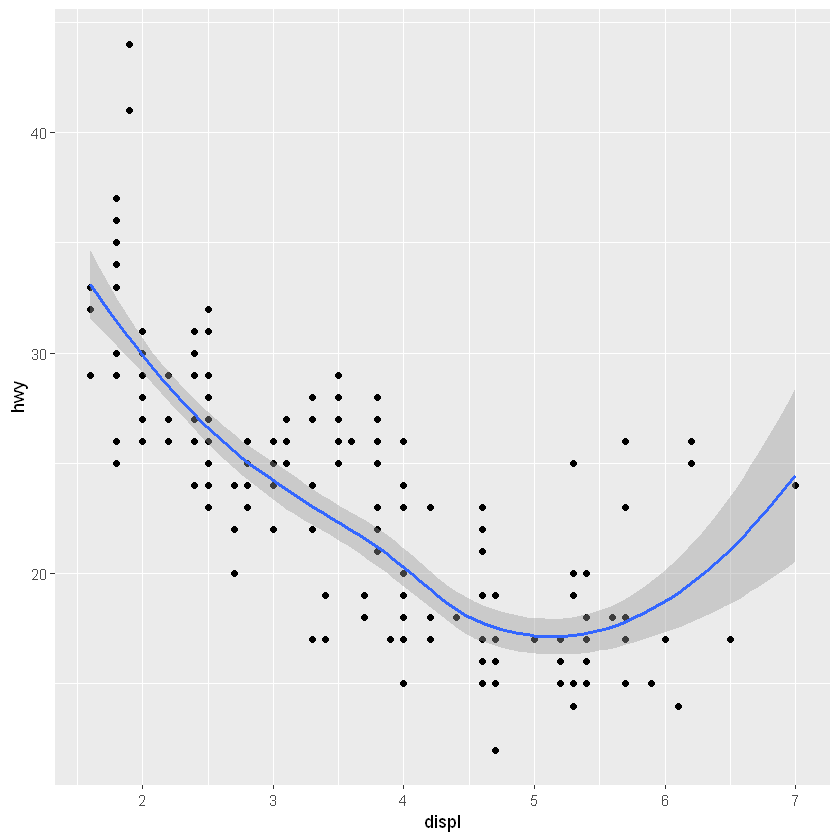

In [6]:
# 추세선 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    stat_smooth()

### ggplot()과 qplot()

- qplot() : 문법이 간단하지만 기능이 적기 때문에 주로 전처리 단계에서 빠르게 데이터를 확인하는 용도로 활용

- ggplot() : 최종 분석 결과 보고용 그래프를 만들 때 사용. 그래프의 세부 요소들을 자유롭게 조절할 수 있음

### 그래프 그리기 연습

1. mpg데이터에서 x축은 cty, y축은 hwy로 된 산점도 그리기

2. midwest데이터에서 x축은 poptotal, y축은 popasian으로 된 산점도 그리기. 단, 전체 인구는 50만명 이하, 아시아인 인구는 1만명 이하인 지역만 표시되도록

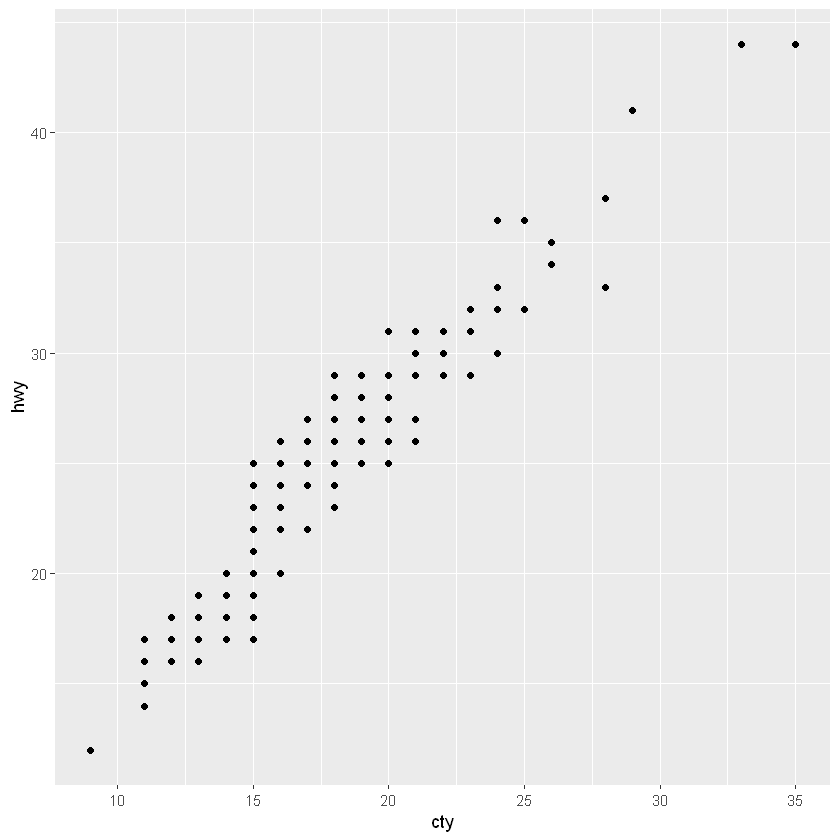

In [7]:
ggplot(data = mpg, aes(x = cty, y = hwy)) +
    geom_point()

Warning message:
"Removed 15 rows containing missing values (geom_point)."

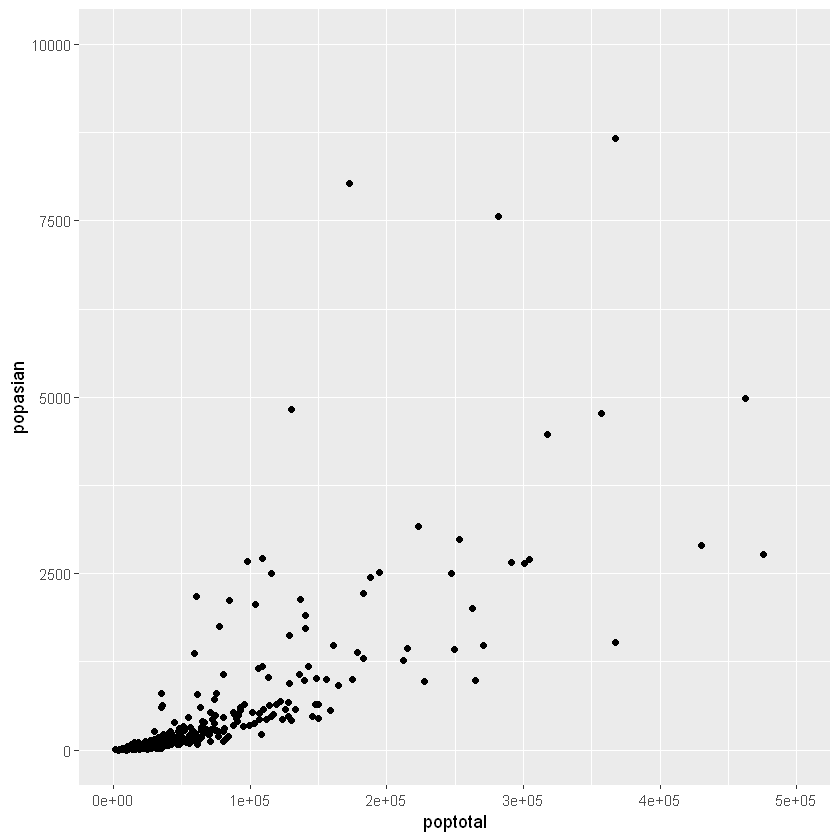

In [8]:
ggplot(data = midwest, aes(x = poptotal, y = popasian)) +
    geom_point() +
    xlim(0, 500000) +
    ylim(0, 10000)

## 막대 그래프

- 막대 그래프(Bar Chart)
    - 데이터의 크기를 막대의 길이로 표현한 그래프
    
- 성별 소득 차이처럼 집단 간의 차이를 표현할 때 주로 사용

In [9]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [10]:
# 평균 막대 그래프
# mpg 데이터를 이용해 drv별 평균 hwy 막대 그래프 그리기

mpg <- as.data.frame(ggplot2::mpg)

df_mpg <- mpg %>%
    group_by(drv) %>%
    summarise(mean_hwy = mean(hwy))

df_mpg

drv,mean_hwy
4,19.17476
f,28.16038
r,21.00000


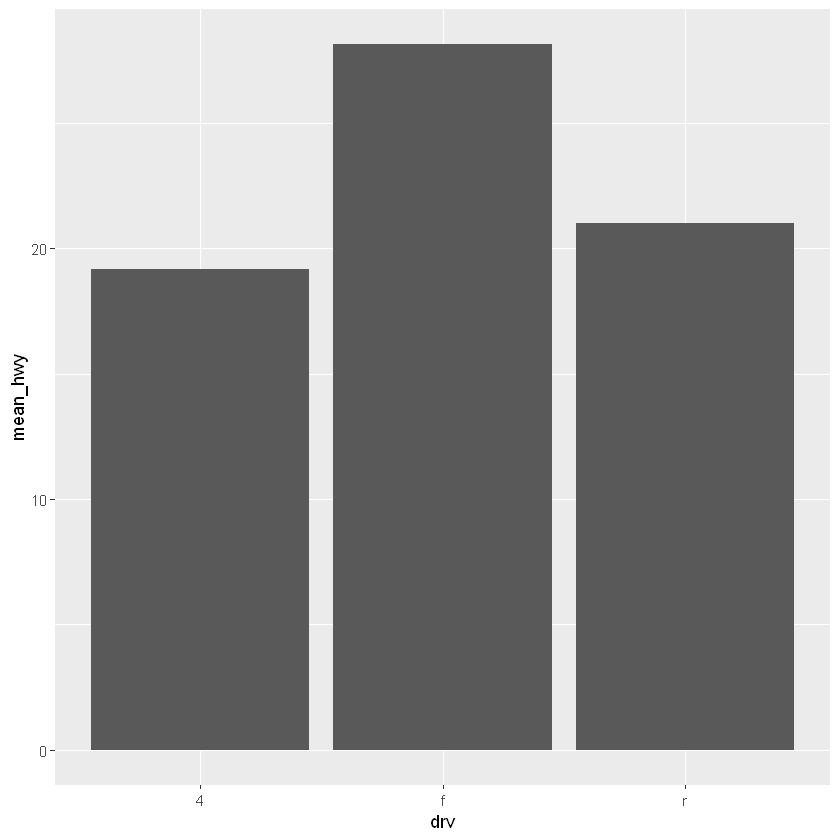

In [11]:
# 그래프 그리기
ggplot(data = df_mpg, aes(x = drv, y = mean_hwy)) +
    geom_col()

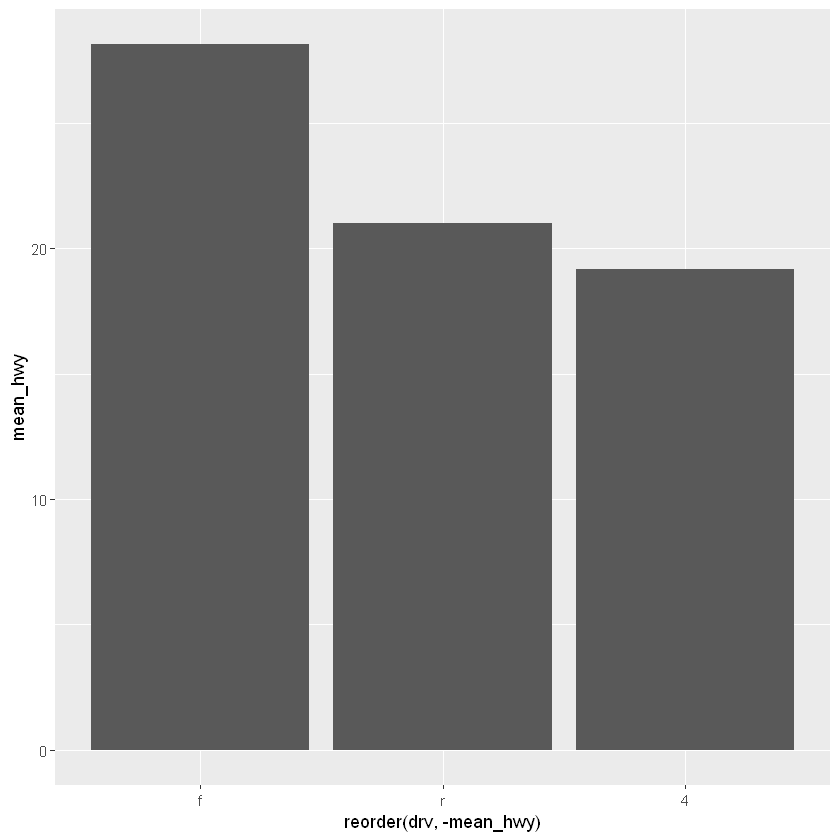

In [14]:
# 크기 순으로 정렬하기
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) +
    geom_col()

### 빈도 막대 그래프

- 값의 개수로 막대의 길이를 표현
- y축 없이 x축만 지정
- geom_bar() 함수를 사용

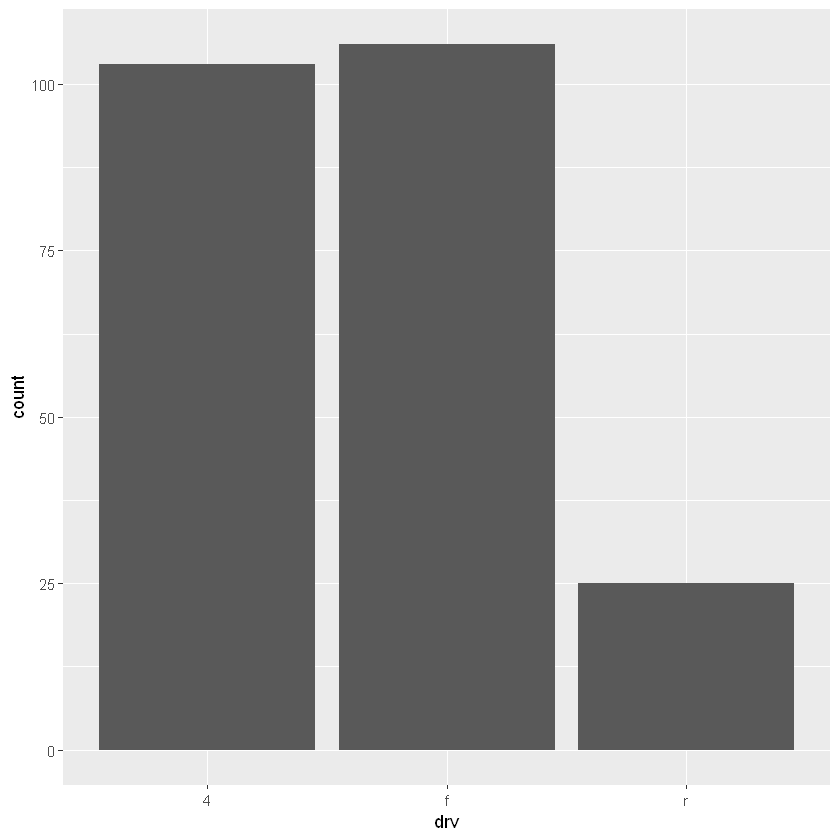

In [15]:
# drv 변수 항목별 빈도 막대 그래프
ggplot(data = mpg, aes(x = drv)) +
    geom_bar()